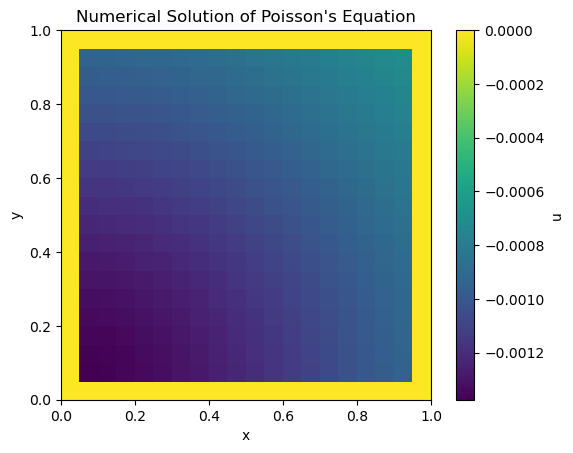

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define problem parameters
nx = ny = 20  # Number of elements in each direction
Lx = Ly = 1.0  # Domain size
dx = Lx / (nx - 1)
dy = Ly / (ny - 1)

# Define function for source term
def f(x, y):
    return -1.0

# Define function for Dirichlet boundary condition
def u_D(x, y):
    return 0.0

# Set up the mesh
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

# Define the finite element basis functions
def basis_functions(xi, eta):
    phi = np.array([(1 - xi) * (1 - eta) / 4,
                    (1 + xi) * (1 - eta) / 4,
                    (1 + xi) * (1 + eta) / 4,
                    (1 - xi) * (1 + eta) / 4])
    return phi

# Define the gradient of basis functions
def basis_function_gradients(xi, eta):
    dphi_dxi = np.array([-(1 - eta) / 4, (1 - eta) / 4, (1 + eta) / 4, -(1 + eta) / 4])
    dphi_deta = np.array([-(1 - xi) / 4, -(1 + xi) / 4, (1 + xi) / 4, (1 - xi) / 4])
    return dphi_dxi, dphi_deta

# Initialize stiffness matrix and load vector
A = np.zeros((nx*ny, nx*ny))
b = np.zeros(nx*ny)

# Assemble stiffness matrix and load vector
for i in range(nx-1):
    for j in range(ny-1):
        vertices = [(x[i], y[j]), (x[i+1], y[j]), (x[i+1], y[j+1]), (x[i], y[j+1])]
        for k in range(4):
            phi = basis_functions(*vertices[k])
            dphi_dxi, dphi_deta = basis_function_gradients(*vertices[k])
            for l in range(4):
                dphi_dx, dphi_dy = dphi_dxi * (1/dx), dphi_deta * (1/dy)
                A[i*nx + j, i*nx + j] += np.dot(dphi_dx, dphi_dx) + np.dot(dphi_dy, dphi_dy)
                b[i*nx + j] += phi[l] * f(*vertices[l])

# Apply Dirichlet boundary conditions
for i in range(nx):
    j = 0
    k = i*nx + j
    A[k, :] = 0
    A[k, k] = 1
    b[k] = u_D(x[i], y[j])
    j = ny - 1
    k = i*nx + j
    A[k, :] = 0
    A[k, k] = 1
    b[k] = u_D(x[i], y[j])
for j in range(1, ny-1):
    i = 0
    k = i*nx + j
    A[k, :] = 0
    A[k, k] = 1
    b[k] = u_D(x[i], y[j])
    i = nx - 1
    k = i*nx + j
    A[k, :] = 0
    A[k, k] = 1
    b[k] = u_D(x[i], y[j])

# Solve linear system
u = np.linalg.solve(A, b)

# Reshape solution vector into grid
U = u.reshape((nx, ny))

# Plot solution
plt.imshow(U, extent=[0, Lx, 0, Ly], origin='lower', cmap='viridis')
plt.colorbar(label='u')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Numerical Solution of Poisson\'s Equation')
plt.show()
